**IMPORTING LIBRARIES**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**LOADING THE DATASET**

In [6]:
data = pd.read_csv(r"C:\Users\fastf\Downloads\Rainfall dataset\district wise rainfall normal.csv")


**DATA PREPROCESSING**

In [8]:
data.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [11]:
data.isnull().sum()

STATE_UT_NAME    0
DISTRICT         0
JAN              0
FEB              0
MAR              0
APR              0
MAY              0
JUN              0
JUL              0
AUG              0
SEP              0
OCT              0
NOV              0
DEC              0
ANNUAL           0
Jan-Feb          0
Mar-May          0
Jun-Sep          0
Oct-Dec          0
dtype: int64

In [12]:
data.columns

Index(['STATE_UT_NAME', 'DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb',
       'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

In [13]:
data['DISTRICT'].unique()

array(['NICOBAR', 'SOUTH ANDAMAN', 'N & M ANDAMAN', 'LOHIT', 'EAST SIANG',
       'SUBANSIRI F.D', 'TIRAP', 'ANJAW (LOHIT)', 'LOWER DIBANG',
       'CHANGLANG', 'PAPUM PARE', 'LOW SUBANSIRI', 'UPPER SIANG',
       'WEST SIANG', 'DIBANG VALLEY', 'WEST KAMENG', 'EAST KAMENG',
       'TAWANG(W KAME', 'KURUNG KUMEY', 'CACHAR', 'DARRANG', 'GOALPARA',
       'KAMRUP', 'LAKHIMPUR', 'NORTH CACHAR', 'NAGAON', 'SIVASAGAR',
       'BARPETA', 'DHUBRI', 'DIBRUGARH', 'JORHAT', 'KARIMGANJ',
       'KOKRAJHAR', 'SHONITPUR', 'GOLAGHAT', 'TINSUKIA', 'HAILAKANDI',
       'DHEMAJI(LAKHI', 'KARBI ANGLONG', 'UDALGURI(DARA', 'KAMRUP METROP',
       'CHIRANG(BONGAI', 'BAKSA BARPETA', 'BONGAIGAON', 'MORIGAON',
       'NALBARI', 'EAST KHASI HI', 'JAINTIA HILLS', 'EAST GARO HIL',
       'RI-BHOI', 'SOUTH GARO HI', 'W KHASI HILL', 'WEST GARO HIL',
       'IMPHAL EAST', 'SENAPATI', 'TAMENGLONG', 'CHANDEL', 'UKHRUL',
       'THOUBAL', 'BISHNUPUR', 'IMPHAL WEST', 'CHURACHANDPUR', 'AIZAWL',
       'CHAMPHAI', 'KOLASI

In [14]:
def rainwater_harvest(rainfall_mm, rooftop_area_m2, runoff_coeff=0.8):
    return rainfall_mm * rooftop_area_m2 * runoff_coeff


In [15]:
def previous_conservation(rainfall_mm, rooftop_area_m2, existing_collection_percent=0.2):
    return rainwater_harvest(rainfall_mm, rooftop_area_m2, runoff_coeff=0.8) * existing_collection_percent


In [16]:
def potential_water_loss(rainfall_mm, rooftop_area_m2, existing_collection_percent=0.2):
    total_possible = rainwater_harvest(rainfall_mm, rooftop_area_m2, runoff_coeff=0.8)
    collected = previous_conservation(rainfall_mm, rooftop_area_m2, existing_collection_percent)
    return total_possible - collected

In [22]:
data.rename(columns={
    'STATE_UT_NAME': 'State',
    'DISTRICT': 'District',
    'ANNUAL': 'Avg_Rainfall_mm'
}, inplace=True)


print(data.head())
print(data.columns)

                         State       District    JAN   FEB    MAR    APR  \
0  ANDAMAN And NICOBAR ISLANDS        NICOBAR  107.3  57.9   65.2  117.0   
1  ANDAMAN And NICOBAR ISLANDS  SOUTH ANDAMAN   43.7  26.0   18.6   90.5   
2  ANDAMAN And NICOBAR ISLANDS  N & M ANDAMAN   32.7  15.9    8.6   53.4   
3            ARUNACHAL PRADESH          LOHIT   42.2  80.8  176.4  358.5   
4            ARUNACHAL PRADESH     EAST SIANG   33.3  79.5  105.9  216.5   

     MAY    JUN    JUL    AUG    SEP    OCT    NOV    DEC  Avg_Rainfall_mm  \
0  358.5  295.5  285.0  271.9  354.8  326.0  315.2  250.9           2805.2   
1  374.4  457.2  421.3  423.1  455.6  301.2  275.8  128.3           3015.7   
2  343.6  503.3  465.4  460.9  454.8  276.1  198.6  100.0           2913.3   
3  306.4  447.0  660.1  427.8  313.6  167.1   34.1   29.8           3043.8   
4  323.0  738.3  990.9  711.2  568.0  206.9   29.5   31.7           4034.7   

   Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0    165.2    540.7   1207.2    89

In [26]:
data['State'] = data['State'].str.strip().str.upper()
data['District'] = data['District'].str.strip().str.upper()

print(data[['State','District','Avg_Rainfall_mm']].head())


                         State       District  Avg_Rainfall_mm
0  ANDAMAN AND NICOBAR ISLANDS        NICOBAR           2805.2
1  ANDAMAN AND NICOBAR ISLANDS  SOUTH ANDAMAN           3015.7
2  ANDAMAN AND NICOBAR ISLANDS  N & M ANDAMAN           2913.3
3            ARUNACHAL PRADESH          LOHIT           3043.8
4            ARUNACHAL PRADESH     EAST SIANG           4034.7


**RAINWATER HARVESTING  POTENTIAL**


In [30]:
user_state = input("Enter your State: ").strip().upper()
user_district = input("Enter your District: ").strip().upper()
district_data = data[(data['State'] == user_state) & (data['District'] == user_district)]

if district_data.empty:
    print("District data not found! Check spelling.")
else:
    avg_rainfall = district_data['Avg_Rainfall_mm'].values[0]
    print(f"Average Rainfall in {user_district}: {avg_rainfall} mm/year")
    harvested = rainwater_harvest(avg_rainfall, 1)
    prev_collected = previous_conservation(avg_rainfall, 1)
    water_loss = potential_water_loss(avg_rainfall, 1)

    print(f"\nEstimated Rainwater Harvested per 1 m²: {harvested:.2f} liters/year")
    print(f"Previously Collected Water per 1 m²: {prev_collected:.2f} liters/year")
    print(f"Potential Water Loss per 1 m²: {water_loss:.2f} liters/year")



Enter your State:  ARUNACHAL PRADESH
Enter your District:  LOHIT


Average Rainfall in LOHIT: 3043.8 mm/year

Estimated Rainwater Harvested per 1 m²: 2435.04 liters/year
Previously Collected Water per 1 m²: 487.01 liters/year
Potential Water Loss per 1 m²: 1948.03 liters/year


**SEASONAL RAINFALL INSIGHTS**

In [31]:
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_harvest = {}

for season in seasons:
    seasonal_rainfall = district_data[season].values[0]
    seasonal_harvest[season] = rainwater_harvest(seasonal_rainfall, 1)  # per 1 m²

print("Seasonal Rainwater Harvested (per 1 m²):")
for season, water in seasonal_harvest.items():
    print(f"{season}: {water:.2f} liters")

Seasonal Rainwater Harvested (per 1 m²):
Jan-Feb: 98.40 liters
Mar-May: 673.04 liters
Jun-Sep: 1478.80 liters
Oct-Dec: 184.80 liters


In [33]:
print(" Monsoon period (highest water potential): Jun-Sep")


 Monsoon period (highest water potential): Jun-Sep


**WATER POTENTIAL FOR MULTIPLE ROOFTOPS**

In [34]:
num_households = int(input("Enter number of households: "))

total_harvested = harvested * num_households
total_prev_collected = prev_collected * num_households
total_water_loss = water_loss * num_households

print(f"\nTotal Estimated Water Harvested: {total_harvested:.2f} liters/year")
print(f"Total Previously Collected Water: {total_prev_collected:.2f} liters/year")
print(f"Total Potential Water Loss: {total_water_loss:.2f} liters/year")


Enter number of households:  4



Total Estimated Water Harvested: 9740.16 liters/year
Total Previously Collected Water: 1948.03 liters/year
Total Potential Water Loss: 7792.13 liters/year


**COMPARISON WITH HISTORICAL AVERAGES**

In [35]:
current_rainfall = float(input("Enter current annual rainfall in mm: "))
average_rainfall = district_data['Avg_Rainfall_mm'].values[0]

if current_rainfall > average_rainfall:
    print(f"Rainfall this year ({current_rainfall} mm) is above the average ({average_rainfall} mm).")
else:
    print(f"Rainfall this year ({current_rainfall} mm) is below the average ({average_rainfall} mm).")


Enter current annual rainfall in mm:  456


Rainfall this year (456.0 mm) is below the average (3043.8 mm).


**POTENTIAL SAVINGS**

In [38]:

num_households = int(input("Enter number of households: "))
garden_per_m2 = harvested / 3
toilet_per_m2 = harvested / 3
washing_per_m2 = harvested / 3
garden_total = garden_per_m2 * num_households
toilet_total = toilet_per_m2 * num_households
washing_total = washing_per_m2 * num_households

print(f"Potential Water Savings for {num_households} households:")
print(f"Gardening: {garden_total:.2f} liters/year")
print(f"Toilet Flushing: {toilet_total:.2f} liters/year")
print(f"Washing: {washing_total:.2f} liters/year")


Enter number of households:  7


Potential Water Savings for 7 households:
Gardening: 5681.76 liters/year
Toilet Flushing: 5681.76 liters/year
Washing: 5681.76 liters/year


**AWARENESS CHARTS**

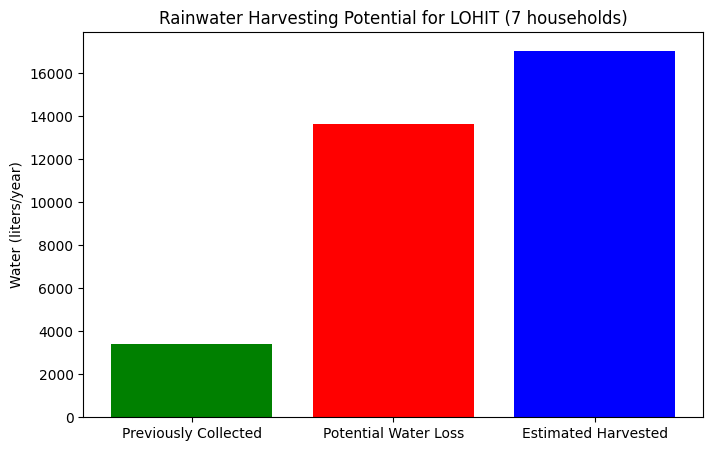

In [39]:
labels = ['Previously Collected', 'Potential Water Loss', 'Estimated Harvested']
values = [prev_collected*num_households, water_loss*num_households, harvested*num_households]
colors = ['green', 'red', 'blue']

plt.figure(figsize=(8,5))
plt.bar(labels, values, color=colors)
plt.ylabel("Water (liters/year)")
plt.title(f"Rainwater Harvesting Potential for {user_district} ({num_households} households)")
plt.show()

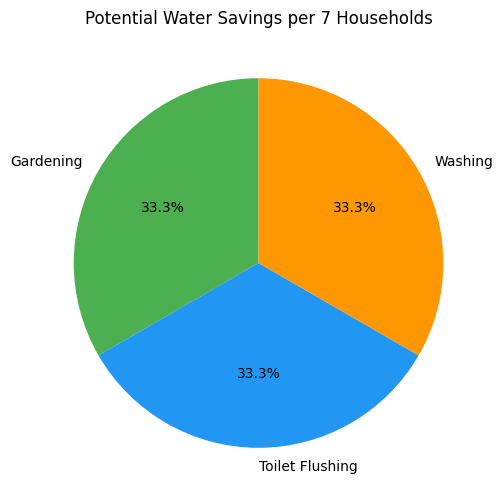

In [40]:
savings_labels = ['Gardening', 'Toilet Flushing', 'Washing']
savings_values = [garden_total, toilet_total, washing_total]
savings_colors = ['#4CAF50', '#2196F3', '#FF9800']

plt.figure(figsize=(6,6))
plt.pie(savings_values, labels=savings_labels, colors=savings_colors, autopct='%1.1f%%', startangle=90)
plt.title(f"Potential Water Savings per {num_households} Households")
plt.show()

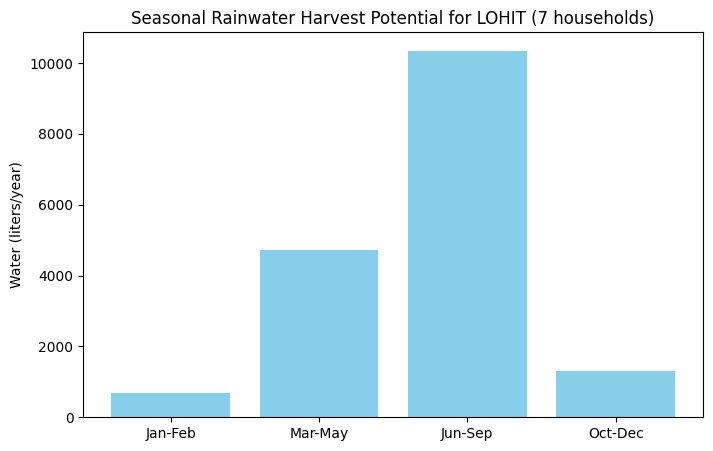

In [41]:
seasons = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_harvest = {season: rainwater_harvest(district_data[season].values[0], 1)*num_households for season in seasons}

plt.figure(figsize=(8,5))
plt.bar(seasonal_harvest.keys(), seasonal_harvest.values(), color='skyblue')
plt.ylabel("Water (liters/year)")
plt.title(f"Seasonal Rainwater Harvest Potential for {user_district} ({num_households} households)")
plt.show()

In [43]:
import random
water_quotes = [
    "💧 Save water, save life.",
    "🌿 Every drop counts — conserve water!",
    "🚰 Don’t let our future go down the drain.",
    "💦 Water is life — don’t waste it.",
    "🌱 Rainwater is precious — harvest it wisely.",
    "💧 Conserve water today, ensure life tomorrow.",
    "🌍 Protect water, protect the planet.",
    "💦 Small actions, big impact — save water!",
]


print("Water Awareness Quote:")
print(random.choice(water_quotes))


Water Awareness Quote:
🌱 Rainwater is precious — harvest it wisely.
